In [16]:
url='http://apis.data.go.kr/B552583/job/job_list_env?'
serviceKey='serviceKey'
key='wKXVoZD3JTnajz7I2NG5STcdGGkG%2B9wYeT0RnnZnbFzOnVpgdv5oysBgCVdD3HomSPkHinfymX9QAYSjj2Vc1Q%3D%3D'
page='&pageNo='
pagenum='1'
numrow='&numOfRows='
numrown='10000'

In [17]:
url=url+serviceKey+key+page+pagenum+numrow+numrown
print(url)

http://apis.data.go.kr/B552583/job/job_list_env?serviceKeywKXVoZD3JTnajz7I2NG5STcdGGkG%2B9wYeT0RnnZnbFzOnVpgdv5oysBgCVdD3HomSPkHinfymX9QAYSjj2Vc1Q%3D%3D&pageNo=1&numOfRows=10000


In [18]:
from bs4 import BeautifulSoup as bs 
from time import sleep
import requests
xml=requests.get(url,verify=False)

soup=bs(xml.text,'html.parser')
soup.find_all('item')

[<item><busplaname>(주)지에스씨넷 서울지점</busplaname><cntctno>1588-1519</cntctno><compaddr>서울특별시 서초구 강남대로41길 8 5층(서초동)</compaddr><emptype>계약직</emptype><entertype>무관</entertype><envbothhands>양손작업 가능</envbothhands><enveyesight>아주 작은 글씨를 읽을 수 있음</enveyesight><envhandwork>정밀한 작업가능</envhandwork><envlstntalk>듣고 말하는 작업 어려움</envlstntalk><jobnm>사무 보조원</jobnm><offerregdt>20240112</offerregdt><regdt>20240112</regdt><regagnname>한국장애인고용공단 서울동부지사</regagnname><reqcareer>0년개월</reqcareer><reqeduc>대졸</reqeduc><reqlicens>사회복지사2급/직업상담사2급/</reqlicens><rno>1</rno><rnum>1</rnum><salary>26,000,000</salary><salarytype>연봉</salarytype><termdate>2024-01-12~2024-01-26</termdate></item>,
 <item><busplaname>전주초포초등학교</busplaname><cntctno>1588-1519</cntctno><compaddr>전라북도 전주시 덕진구 초포로 171 (호성동2가), 2가 835</compaddr><emptype>계약직</emptype><entertype>무관</entertype><jobnm>아동 생활지도원(돌봄서비스원)</jobnm><offerregdt>20240112</offerregdt><regdt>20240112</regdt><regagnname>한국장애인고용공단 전북지사</regagnname><reqcareer>0년개월</reqcareer><reqeduc>무관</req

In [22]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming 'soup' is the BeautifulSoup object containing the XML data

items = soup.find_all('item')

data = []

for item in items:
    data.append({
        '사업장명': item.find('busplaname').text if item.find('busplaname') else None,
        '주소': item.find('compaddr').text if item.find('compaddr') else None,
        '고용형태': item.find('emptype').text if item.find('emptype') else None,
        '하는일': item.find('jobnm').text if item.find('jobnm') else None,
        '구인신청일': item.find('offerregdt').text if item.find('offerregdt') else None,
        '등록일': item.find('regdt').text if item.find('regdt') else None,
        '담당기관': item.find('regagnname').text if item.find('regagnname') else None,
        '급여': item.find('salary').text if item.find('salary') else None,
        '급여형태': item.find('salarytype').text if item.find('salarytype') else None,
        '기간': item.find('termdate').text if item.find('termdate') else None,
    })

df = pd.DataFrame(data)
display(df)


,사업장명,주소,고용형태,하는일,구인신청일,등록일,담당기관,급여,급여형태,기간
0,(주)지에스씨넷 서울지점,서울특별시 서초구 강남대로41길 8 5층(서초동),계약직,사무 보조원,20240112,20240112,한국장애인고용공단 서울동부지사,"26,000,000",연봉,2024-01-12~2024-01-26
1,전주초포초등학교,"전라북도 전주시 덕진구 초포로 171 (호성동2가), 2가 835",계약직,아동 생활지도원(돌봄서비스원),20240112,20240112,한국장애인고용공단 전북지사,"9,860",시급,2024-01-12~2024-01-22
2,이리송학초등학교,전라북도 익산시 송학동 109,상용직,교육행정 사무원,20240112,20240112,한국장애인고용공단 전북지사,"9,860",시급,2024-01-12~2024-01-31
3,슈나이더일렉트릭코리아(주),"서울특별시 마포구 성암로 189 14층 (상암동,중소기업 DMC 타워)",계약직,건물 청소원(클린마스터),20240112,20240112,한국장애인고용공단 전북지사,"1,660,000",월급,2024-01-12~2024-01-26
4,삼성생명보험(주),"서울특별시 서초구 서초대로74길 11 (서초동, 삼성전자 서초사옥) (서초동)",계약직,사무 보조원,20240112,20240112,한국장애인고용공단 서울동부지사,"1,240,670",월급,2024-01-12~2024-01-22
...,...,...,...,...,...,...,...,...,...,...
155,주식회사 삼구에프에스,"서울특별시 구로구 디지털로31길 38-21 905호 (구로동, 이앤씨드림타워3차)",상용직,단체 급식 보조원,20231110,20231110,한국장애인고용공단 충남지사,"9,860",시급,2023-11-10~2024-02-09
156,(주)지아이텍,충청남도 아산시 둔포면 아산밸리로387번길 42 지아이텍,상용직,건물 경비원,20231108,20231108,한국장애인고용공단 충남지사,"9,860",시급,2023-11-08~2024-02-07
157,에이원심사손해사정(주),서울특별시 영등포구 선유로49길 23 (양평동4가),상용직,네일 아티스트(손톱 관리사),20231107,20231107,한국장애인고용공단 충북지사,"1,550,000",월급,2023-11-07~2024-02-05
158,(주)엠디에스,충청남도 아산시 둔포면 이화서길 23 (주)엠디에스,상용직,세탁원,20231106,20231106,한국장애인고용공단 충남지사,"9,860",시급,2023-11-06~2024-02-05


In [25]:
df=df[df['주소'].str.contains('서울')]
df.head(2)

,사업장명,주소,고용형태,하는일,구인신청일,등록일,담당기관,급여,급여형태,기간
0,(주)지에스씨넷 서울지점,서울특별시 서초구 강남대로41길 8 5층(서초동),계약직,사무 보조원,20240112,20240112,한국장애인고용공단 서울동부지사,"26,000,000",연봉,2024-01-12~2024-01-26
3,슈나이더일렉트릭코리아(주),"서울특별시 마포구 성암로 189 14층 (상암동,중소기업 DMC 타워)",계약직,건물 청소원(클린마스터),20240112,20240112,한국장애인고용공단 전북지사,"1,660,000",월급,2024-01-12~2024-01-26


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 157
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    61 non-null     object
 1   주소      61 non-null     object
 2   고용형태    61 non-null     object
 3   하는일     61 non-null     object
 4   구인신청일   61 non-null     object
 5   등록일     61 non-null     object
 6   담당기관    61 non-null     object
 7   급여      61 non-null     object
 8   급여형태    61 non-null     object
 9   기간      61 non-null     object
 10  자치구     61 non-null     object
dtypes: object(11)
memory usage: 7.8+ KB


In [45]:
df['자치구']=df['주소'].str.split().str[1]

In [49]:
df.head(3)

,사업장명,주소,고용형태,하는일,구인신청일,등록일,담당기관,급여,급여형태,기간,자치구
0,(주)지에스씨넷 서울지점,서울특별시 서초구 강남대로41길 8 5층(서초동),계약직,사무 보조원,20240112,20240112,한국장애인고용공단 서울동부지사,"26,000,000",연봉,2024-01-12~2024-01-26,서초구
3,슈나이더일렉트릭코리아(주),"서울특별시 마포구 성암로 189 14층 (상암동,중소기업 DMC 타워)",계약직,건물 청소원(클린마스터),20240112,20240112,한국장애인고용공단 전북지사,"1,660,000",월급,2024-01-12~2024-01-26,마포구
4,삼성생명보험(주),"서울특별시 서초구 서초대로74길 11 (서초동, 삼성전자 서초사옥) (서초동)",계약직,사무 보조원,20240112,20240112,한국장애인고용공단 서울동부지사,"1,240,670",월급,2024-01-12~2024-01-22,서초구


In [51]:
df['자치구'].unique()

array(['서초구', '마포구', '중구', '송파구', '강남구', '용산구', '서대문구', '영등포구', '강동구',
       '종로구', '중랑구', '성북구', '강서구', '금천구', '구로구'], dtype=object)

In [53]:
df.to_csv('서울구인(API).csv',index=False)

In [106]:
df=pd.read_csv('한국장애인고용공단_장애인 취업 정보.csv',encoding='cp949')
df

,순번,취업일자,연령,장애유형,중증여부,근무지역,취업직종대분류
0,1.0,2022-06-01,26.0,정신장애,중증,경기 용인시,경영·행정·사무직
1,2.0,2022-01-01,28.0,지적장애,중증,충북 영동군,경영·행정·사무직
2,3.0,2022-01-01,19.0,지적장애,중증,충북 영동군,경영·행정·사무직
3,4.0,2022-01-01,22.0,지적장애,중증,충북 영동군,경영·행정·사무직
4,5.0,2022-01-01,23.0,지적장애,중증,충북 영동군,경영·행정·사무직
...,...,...,...,...,...,...,...
46573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46576,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df.drop('순번',axis=1,inplace=True)

In [108]:
df=df.dropna()

In [109]:
df=df[df['근무지역'].str.contains('서울')]

# df.drop('index',axis=1,inplace=True)

In [110]:
df=df.reset_index(drop=True)

In [111]:
df

,취업일자,연령,장애유형,중증여부,근무지역,취업직종대분류
0,2022-04-18,25.0,청각장애,경증,서울 송파구,경영·행정·사무직
1,2022-04-18,27.0,뇌병변장애,중증,서울 송파구,경영·행정·사무직
2,2022-04-18,28.0,심장장애,중증,서울 송파구,경영·행정·사무직
3,2022-10-21,68.0,지체장애,경증,서울 서초구,청소 및 기타 개인서비스직
4,2022-05-09,52.0,지체장애,경증,서울 서초구,청소 및 기타 개인서비스직
...,...,...,...,...,...,...
9963,2022-12-12,30.0,지적장애,중증,서울 금천구,전기·전자 설치·정비·생산직
9964,2022-11-28,50.0,시각장애,경증,서울 은평구,경영·행정·사무직
9965,2022-12-05,63.0,지체장애,경증,서울 도봉구,보건·의료직
9966,2022-10-01,52.0,뇌병변장애,경증,서울 구로구,교육직


In [112]:
df['자치구']=df['근무지역'].str.split().str[1]

In [125]:
df

,취업일자,연령,장애유형,중증여부,근무지역,취업직종대분류,자치구
0,2022-04-18,25.0,청각장애,경증,서울 송파구,경영·행정·사무직,송파구
1,2022-04-18,27.0,뇌병변장애,중증,서울 송파구,경영·행정·사무직,송파구
2,2022-04-18,28.0,심장장애,중증,서울 송파구,경영·행정·사무직,송파구
3,2022-10-21,68.0,지체장애,경증,서울 서초구,청소 및 기타 개인서비스직,서초구
4,2022-05-09,52.0,지체장애,경증,서울 서초구,청소 및 기타 개인서비스직,서초구
...,...,...,...,...,...,...,...
9963,2022-12-12,30.0,지적장애,중증,서울 금천구,전기·전자 설치·정비·생산직,금천구
9964,2022-11-28,50.0,시각장애,경증,서울 은평구,경영·행정·사무직,은평구
9965,2022-12-05,63.0,지체장애,경증,서울 도봉구,보건·의료직,도봉구
9966,2022-10-01,52.0,뇌병변장애,경증,서울 구로구,교육직,구로구


In [126]:
df.to_csv('장애인 취업정보 자치구 뽑아낸거.csv',index=False)

In [127]:
df=pd.read_csv('서울시 사회복지시설 목록.csv',encoding='cp949')
df

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소,정원(수용인원),현인원,전화번호,우편번호
0,서울꽃동네신내노인요양원,A0001,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,1126000000,중랑구,서울특별시 중랑구 신내로 194,234.0,234.0,02-490-2609,02052
1,청운양로원,A0002,(노인) 양로시설,노인주거복지시설,자치구,이종명,1111000000,종로구,서울특별시 종로구 비봉길 76 (구기동),57.0,50.0,02-379-9232,03001
2,청운노인요양원,A0003,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,1111000000,종로구,서울특별시 종로구 비봉길 76 (구기동),45.0,45.0,02-3217-0057,03001
3,홍파양로원,A0004,(노인) 양로시설,노인주거복지시설,자치구,김우리,1135000000,노원구,서울특별시 노원구 동일로248길 30 (상계동),44.0,32.0,02-939-0735,01623
4,천사노인요양원,A0007,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,1150000000,강서구,서울특별시 강서구 강서로45다길 30-22,161.0,151.0,02-2602-2443,07704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,강남발달장애인평생교육센터,Z6325,(장애인) (기타)장애인복지시설,장애인기타,자치구,김미현,1168000000,강남구,"서울특별시 강남구 논현로86길 21, 2층 (역삼동)",24.0,NaN,07043544701,06220
4106,도봉발달장애인 평생교육센터,Z6399,(장애인) (기타)장애인복지시설,장애인기타,자치구,성효진,1132000000,도봉구,"서울특별시 도봉구 마들로 703, 4~6층 (도봉동)",30.0,NaN,029557979,01327
4107,염리종합사회복지관,Z6469,(일반) 사회복지관,일반사회복지시설,자치구,최상진,1144000000,마포구,서울특별시 마포구 대흥로24길 50 (염리동),NaN,NaN,02-3276-1803,04123
4108,서초1인가구지원센터,Z6475,(기타) 기타시설,기타시설,자치구,엄준,1165000000,서초구,"서울특별시 서초구 사평대로 273, 4층 (반포동)",NaN,NaN,0221558283,06544


In [129]:
df['자치구']=df['시설주소'].str.split().str[1]
df

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소,정원(수용인원),현인원,전화번호,우편번호,자치구
0,서울꽃동네신내노인요양원,A0001,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,1126000000,중랑구,서울특별시 중랑구 신내로 194,234.0,234.0,02-490-2609,02052,중랑구
1,청운양로원,A0002,(노인) 양로시설,노인주거복지시설,자치구,이종명,1111000000,종로구,서울특별시 종로구 비봉길 76 (구기동),57.0,50.0,02-379-9232,03001,종로구
2,청운노인요양원,A0003,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,1111000000,종로구,서울특별시 종로구 비봉길 76 (구기동),45.0,45.0,02-3217-0057,03001,종로구
3,홍파양로원,A0004,(노인) 양로시설,노인주거복지시설,자치구,김우리,1135000000,노원구,서울특별시 노원구 동일로248길 30 (상계동),44.0,32.0,02-939-0735,01623,노원구
4,천사노인요양원,A0007,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,1150000000,강서구,서울특별시 강서구 강서로45다길 30-22,161.0,151.0,02-2602-2443,07704,강서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,강남발달장애인평생교육센터,Z6325,(장애인) (기타)장애인복지시설,장애인기타,자치구,김미현,1168000000,강남구,"서울특별시 강남구 논현로86길 21, 2층 (역삼동)",24.0,NaN,07043544701,06220,강남구
4106,도봉발달장애인 평생교육센터,Z6399,(장애인) (기타)장애인복지시설,장애인기타,자치구,성효진,1132000000,도봉구,"서울특별시 도봉구 마들로 703, 4~6층 (도봉동)",30.0,NaN,029557979,01327,도봉구
4107,염리종합사회복지관,Z6469,(일반) 사회복지관,일반사회복지시설,자치구,최상진,1144000000,마포구,서울특별시 마포구 대흥로24길 50 (염리동),NaN,NaN,02-3276-1803,04123,마포구
4108,서초1인가구지원센터,Z6475,(기타) 기타시설,기타시설,자치구,엄준,1165000000,서초구,"서울특별시 서초구 사평대로 273, 4층 (반포동)",NaN,NaN,0221558283,06544,서초구


In [140]:
df=pd.read_csv('장애인 취업정보 자치구 뽑아낸거.csv')
counts=df['자치구'].value_counts()

In [141]:
df

,취업일자,연령,장애유형,중증여부,근무지역,취업직종대분류,자치구
0,2022-04-18,25.0,청각장애,경증,서울 송파구,경영·행정·사무직,송파구
1,2022-04-18,27.0,뇌병변장애,중증,서울 송파구,경영·행정·사무직,송파구
2,2022-04-18,28.0,심장장애,중증,서울 송파구,경영·행정·사무직,송파구
3,2022-10-21,68.0,지체장애,경증,서울 서초구,청소 및 기타 개인서비스직,서초구
4,2022-05-09,52.0,지체장애,경증,서울 서초구,청소 및 기타 개인서비스직,서초구
...,...,...,...,...,...,...,...
9963,2022-12-12,30.0,지적장애,중증,서울 금천구,전기·전자 설치·정비·생산직,금천구
9964,2022-11-28,50.0,시각장애,경증,서울 은평구,경영·행정·사무직,은평구
9965,2022-12-05,63.0,지체장애,경증,서울 도봉구,보건·의료직,도봉구
9966,2022-10-01,52.0,뇌병변장애,경증,서울 구로구,교육직,구로구


C:\Users\USER\AppData\Local\Temp\ipykernel_2832\450097930.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='자치구', y='건수', data=count_by_jachigu, palette='viridis')
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\IPython\c

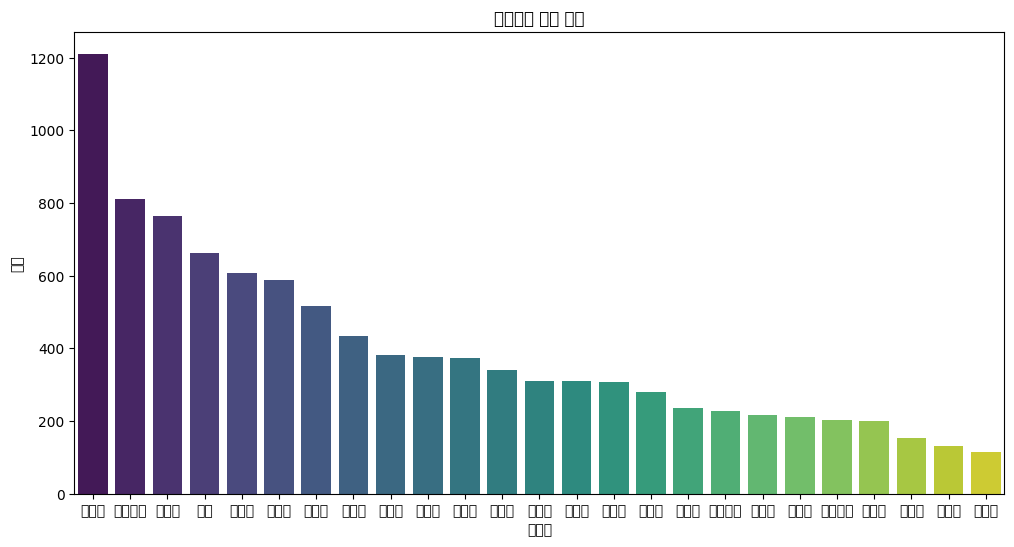

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
count_by_jachigu = df['자치구'].value_counts().reset_index()
count_by_jachigu.columns = ['자치구', '건수']

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='자치구', y='건수', data=count_by_jachigu, palette='viridis')
plt.title('자치구별 취업 건수')
plt.xlabel('자치구')
plt.ylabel('건수')
plt.show()